# 문제 정의 : 서울시 공유 자전거 "따릉이" 대여 예측 모델

* Dataset : bicycle.csv
* Dataset 구성
    * date_time : 일별 날짜
    * wind_direction : 풍향 (degree)
    * sky_condition : 하늘 상태 
    * precipitation_form : 강수 형태 
    * wind_speed : 풍속 (m/s)
    * humidity : 습도 (%)
    * low_temp : 최저 기온 ( `C)
    * high_temp : 최고 기온 ( `C)
    * Precipitation_Probability : 강수 확률 (%)
    * number_of_rentals : 따릉이 대여량

In [1]:
# IPython 매직 명령
%matplotlib inline

# 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 환경 설정
pd.set_option( 'display.max_columns', 20 )
pd.set_option( 'display.max_colwidth', 20 )
pd.set_option( 'display.unicode.east_asian_width', True )

from matplotlib import font_manager, rc

# Windows 사용시 matplotlib 한글 폰트 사용 설정
# font_path = "c:\\Windows\\Fonts\\malgun.ttf"
# font_name = font_manager.FontProperties( fname = font_path ).get_name()
# rc( 'font', family = font_name )

# Mac OS 사용시 matplotlib 한글 폰트 사용 설정
rc( 'font', family = 'AppleGothic' )

import warnings
warnings.filterwarnings( 'ignore' )

import my_lib

## 1. 데이터 수집

* DataFrame 생성
* DataFrame 기본 정보 확인

In [2]:
bicycle = pd.read_csv( '../data/bicycle.csv', index_col = 0 )

In [3]:
bicycle.head()

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
date_time,,,,,,,,,
2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994
2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139
2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817
2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034
2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833


In [4]:
bicycle.tail()

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
date_time,,,,,,,,,
2020-06-26,228.662,3.980,0.223,2.271,78.378,20.500,27.526,36.486,96150
2020-06-27,207.770,2.865,0.081,1.794,78.412,20.812,28.842,21.081,107001
2020-06-28,282.568,1.730,0.000,1.820,72.736,21.000,29.053,7.297,98568
2020-06-29,137.027,2.257,0.088,2.043,70.473,19.625,26.000,15.541,70053
2020-06-30,120.797,3.622,0.432,5.574,77.061,19.125,26.053,41.284,38086


In [5]:
bicycle.info()

<class 'pandas.core.frame.DataFrame'>
Index: 273 entries, 2018-04-01 to 2020-06-30
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   wind_direction             273 non-null    float64
 1   sky_condition              273 non-null    float64
 2   precipitation_form         273 non-null    float64
 3   wind_speed                 273 non-null    float64
 4   humidity                   273 non-null    float64
 5   low_temp                   273 non-null    float64
 6   high_temp                  273 non-null    float64
 7   Precipitation_Probability  273 non-null    float64
 8   number_of_rentals          273 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 21.3+ KB


In [6]:
bicycle.shape

(273, 9)

In [7]:
bicycle.dtypes

wind_direction               float64
sky_condition                float64
precipitation_form           float64
wind_speed                   float64
humidity                     float64
low_temp                     float64
high_temp                    float64
Precipitation_Probability    float64
number_of_rentals              int64
dtype: object

## 2. 데이터 전처리

### 결측치 확인

In [8]:
bicycle.isnull().sum()

wind_direction               0
sky_condition                0
precipitation_form           0
wind_speed                   0
humidity                     0
low_temp                     0
high_temp                    0
Precipitation_Probability    0
number_of_rentals            0
dtype: int64

### 중복값 확인

In [9]:
bicycle.duplicated().sum()

0

### 이상치 확인

#### wind_direction : 풍향 (degree)

In [10]:
bicycle[ 'wind_direction' ].describe()

count    273.000000
mean     202.750967
std       56.659232
min       57.047000
25%      171.541000
50%      209.774000
75%      238.412000
max      321.622000
Name: wind_direction, dtype: float64

In [11]:
bicycle[ 'wind_direction' ].value_counts()

171.541    2
218.574    2
246.784    1
241.885    1
231.115    1
          ..
177.446    1
217.081    1
136.203    1
255.297    1
185.372    1
Name: wind_direction, Length: 271, dtype: int64

<AxesSubplot:>

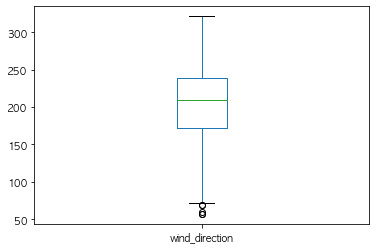

In [12]:
bicycle[ 'wind_direction' ].plot( kind = 'box' )

In [13]:
my_lib.print_outlier( bicycle, 'wind_direction' )

이상치 기준값 : 71.234, 338.718

wind_direction 변수 이상치

[57.149, 57.047, 58.986, 69.128, 68.824]

wind_direction 변수 이상치 개수 : 5개


* wind_direction 변수 이상치는 실제 풍향에 해당함으로 별다른 처리없이 분석에 사용한다.

#### sky_condition : 하늘 상태

In [14]:
bicycle[ 'sky_condition' ].describe()

count    273.000000
mean       2.288256
std        0.961775
min        1.000000
25%        1.405000
50%        2.167000
75%        3.000000
max        4.000000
Name: sky_condition, dtype: float64

In [15]:
bicycle[ 'sky_condition' ].value_counts()

1.000    29
4.000    12
3.595     4
1.608     4
1.716     4
         ..
1.399     1
3.493     1
1.113     1
3.466     1
2.556     1
Name: sky_condition, Length: 181, dtype: int64

<AxesSubplot:>

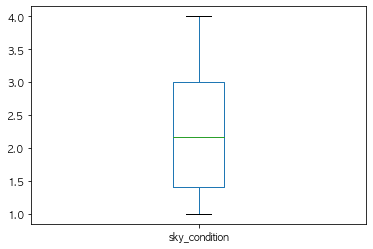

In [16]:
bicycle[ 'sky_condition' ].plot( kind = 'box' )

In [17]:
my_lib.print_outlier( bicycle, 'sky_condition' )

이상치 기준값 : -0.988, 5.392

sky_condition 변수 이상치

[]

sky_condition 변수 이상치 개수 : 0개


* sky_condition 변수는 이상치가 없다.

#### precipitation_form : 강수 형태 

In [18]:
bicycle[ 'precipitation_form' ].describe()

count    273.000000
mean       0.100963
std        0.203193
min        0.000000
25%        0.000000
50%        0.000000
75%        0.088000
max        1.000000
Name: precipitation_form, dtype: float64

In [19]:
bicycle[ 'precipitation_form' ].value_counts()

0.000    181
0.358      5
0.061      4
0.088      4
0.142      4
0.007      4
0.723      3
0.020      3
1.000      3
0.331      3
0.568      2
0.081      2
0.068      2
0.432      2
0.108      2
0.162      2
0.196      2
0.054      2
0.027      2
0.473      2
0.223      2
0.164      1
0.270      1
0.378      1
0.500      1
0.486      1
0.169      1
0.014      1
0.750      1
0.426      1
0.554      1
0.074      1
0.304      1
0.466      1
0.122      1
0.405      1
0.073      1
0.365      1
0.194      1
0.533      1
0.588      1
0.667      1
0.655      1
0.115      1
0.318      1
0.101      1
0.541      1
0.257      1
0.047      1
0.351      1
0.534      1
0.284      1
0.250      1
0.243      1
0.439      1
0.425      1
0.716      1
0.797      1
Name: precipitation_form, dtype: int64

<AxesSubplot:>

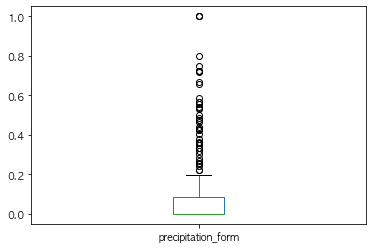

In [20]:
bicycle[ 'precipitation_form' ].plot( kind = 'box' )

In [21]:
my_lib.print_outlier( bicycle, 'precipitation_form' )

이상치 기준값 : -0.132, 0.22

precipitation_form 변수 이상치

[0.425, 0.723, 0.358, 0.473, 0.284, 1.0, 0.331, 0.667, 0.473, 0.588, 0.257, 0.797, 1.0, 0.554, 0.358, 0.723, 0.25, 0.568, 0.378, 0.318, 0.466, 0.5, 0.405, 0.426, 0.486, 0.439, 0.541, 0.655, 0.331, 0.568, 0.365, 0.27, 0.358, 0.304, 0.534, 1.0, 0.358, 0.723, 0.331, 0.351, 0.432, 0.243, 0.223, 0.533, 0.358, 0.716, 0.75, 0.223, 0.432]

precipitation_form 변수 이상치 개수 : 49개


* precipitation_form 변수 이상치는 실제 풍향에 해당함으로 별다른 처리없이 분석에 사용한다.

#### wind_speed : 풍속 (m/s) 

In [22]:
bicycle[ 'wind_speed' ].describe()

count    273.000000
mean       2.480963
std        0.884397
min        0.753000
25%        1.820000
50%        2.411000
75%        2.924000
max        5.607000
Name: wind_speed, dtype: float64

In [23]:
bicycle[ 'wind_speed' ].value_counts()

2.659    3
1.728    3
2.270    2
1.820    2
2.600    2
        ..
3.040    1
4.609    1
1.332    1
2.548    1
1.692    1
Name: wind_speed, Length: 254, dtype: int64

<AxesSubplot:>

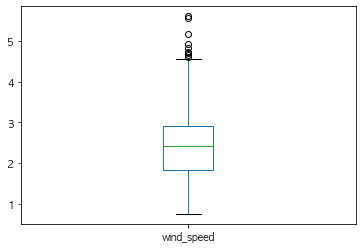

In [24]:
bicycle[ 'wind_speed' ].plot( kind = 'box' )

In [25]:
my_lib.print_outlier( bicycle, 'wind_speed' )

이상치 기준값 : 0.164, 4.58

wind_speed 변수 이상치

[4.824, 5.607, 4.66, 4.916, 4.733, 4.716, 4.609, 5.176, 5.574]

wind_speed 변수 이상치 개수 : 9개


* wind_speed 변수 이상치는 실제 풍향에 해당함으로 별다른 처리없이 분석에 사용한다.

#### humidity : 습도 (%)

In [26]:
bicycle[ 'humidity' ].describe()

count    273.000000
mean      56.745491
std       12.351268
min       24.831000
25%       47.196000
50%       55.845000
75%       66.419000
max       88.885000
Name: humidity, dtype: float64

In [27]:
bicycle[ 'humidity' ].value_counts()

63.277    3
47.027    3
58.919    2
42.500    2
57.939    2
         ..
36.014    1
69.833    1
66.791    1
38.649    1
49.284    1
Name: humidity, Length: 251, dtype: int64

<AxesSubplot:>

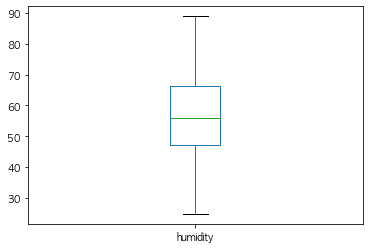

In [28]:
bicycle[ 'humidity' ].plot( kind = 'box' )

In [29]:
my_lib.print_outlier( bicycle, 'humidity' )

이상치 기준값 : 18.362, 95.254

humidity 변수 이상치

[]

humidity 변수 이상치 개수 : 0개


* humidity 변수는 이상치가 없다.

#### low_temp : 최저 기온 ( `C)

In [30]:
bicycle[ 'low_temp' ].describe()

bicycle[ 'low_temp' ].value_counts()

18.000    5
21.000    4
14.375    3
18.062    3
6.562     3
         ..
10.312    1
15.375    1
16.750    1
13.562    1
9.250     1
Name: low_temp, Length: 185, dtype: int64

<AxesSubplot:>

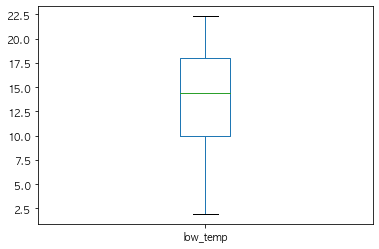

In [31]:
bicycle[ 'low_temp' ].plot( kind = 'box' )

In [32]:
my_lib.print_outlier( bicycle, 'low_temp' )

이상치 기준값 : -2.155, 30.093

low_temp 변수 이상치

[]

low_temp 변수 이상치 개수 : 0개


* low_temp 변수는 이상치가 없다.

#### high_temp : 최고 기온 ( `C)

In [33]:
bicycle[ 'high_temp' ].describe()

count    273.000000
mean      23.384733
std        5.204605
min        9.895000
25%       19.842000
50%       24.158000
75%       27.526000
max       33.421000
Name: high_temp, dtype: float64

In [34]:
bicycle[ 'high_temp' ].value_counts()

25.632    5
21.632    4
27.737    4
27.526    4
29.000    4
         ..
16.053    1
24.737    1
33.421    1
30.000    1
21.211    1
Name: high_temp, Length: 190, dtype: int64

<AxesSubplot:>

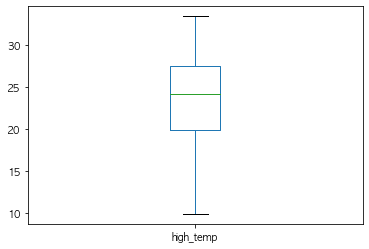

In [35]:
bicycle[ 'high_temp' ].plot( kind = 'box' )

In [36]:
my_lib.print_outlier( bicycle, 'high_temp' )

이상치 기준값 : 8.316, 39.052

high_temp 변수 이상치

[]

high_temp 변수 이상치 개수 : 0개


* high_temp 변수는 이상치가 없다.

#### Precipitation_Probability : 강수 확률 (%)

In [37]:
bicycle[ 'Precipitation_Probability' ].describe()

count    273.000000
mean      16.878103
std       16.643772
min        0.000000
25%        4.054000
50%       12.162000
75%       22.973000
max       82.162000
Name: Precipitation_Probability, dtype: float64

In [38]:
bicycle[ 'Precipitation_Probability' ].value_counts()

0.000     29
7.162      4
8.581      3
3.649      3
4.054      3
          ..
13.784     1
25.068     1
20.000     1
1.284      1
38.176     1
Name: Precipitation_Probability, Length: 207, dtype: int64

<AxesSubplot:>

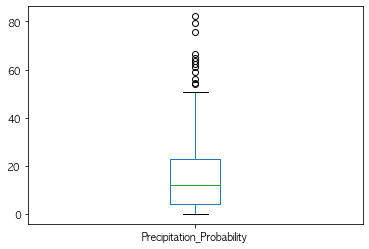

In [39]:
bicycle[ 'Precipitation_Probability' ].plot( kind = 'box' )

In [40]:
my_lib.print_outlier( bicycle, 'Precipitation_Probability' )

이상치 기준값 : -24.324, 51.351

Precipitation_Probability 변수 이상치

[63.378, 75.608, 56.0, 54.392, 66.554, 79.257, 64.865, 58.851, 82.162, 61.216, 62.5, 54.054]

Precipitation_Probability 변수 이상치 개수 : 12개


* Precipitation_Probability 변수 이상치는 실제 풍향에 해당함으로 별다른 처리없이 분석에 사용한다.

#### number_of_rentals : 따릉이 대여량

In [41]:
bicycle[ 'number_of_rentals' ].describe()

count       273.000000
mean      59574.978022
std       27659.575774
min        1037.000000
25%       36761.000000
50%       63032.000000
75%       81515.000000
max      110377.000000
Name: number_of_rentals, dtype: float64

In [42]:
bicycle[ 'number_of_rentals' ].value_counts()

33738    2
73685    1
76110    1
66392    1
35159    1
        ..
72883    1
8374     1
39036    1
57020    1
60925    1
Name: number_of_rentals, Length: 272, dtype: int64

<AxesSubplot:>

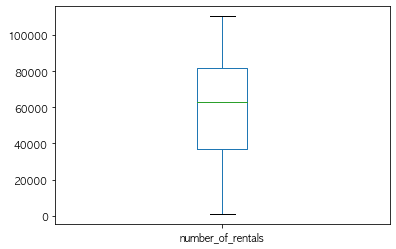

In [43]:
bicycle[ 'number_of_rentals' ].plot( kind = 'box' )

In [44]:
my_lib.print_outlier( bicycle, 'number_of_rentals' )

이상치 기준값 : -30370.0, 148646.0

number_of_rentals 변수 이상치

[]

number_of_rentals 변수 이상치 개수 : 0개


* number_of_rentals 변수는 이상치가 없다.

## 3. EDA

### 기초 통계

In [45]:
bicycle[ [ 'wind_direction', 'sky_condition', 'precipitation_form' ] ].describe()

,wind_direction,sky_condition,precipitation_form
count,273.000000,273.000000,273.000000
mean,202.750967,2.288256,0.100963
std,56.659232,0.961775,0.203193
min,57.047000,1.000000,0.000000
25%,171.541000,1.405000,0.000000
50%,209.774000,2.167000,0.000000
75%,238.412000,3.000000,0.088000
max,321.622000,4.000000,1.000000


In [46]:
bicycle[ [ 'wind_speed', 'humidity', 'low_temp', 'high_temp' ] ].describe()

,wind_speed,humidity,low_temp,high_temp
count,273.000000,273.000000,273.000000,273.000000
mean,2.480963,56.745491,13.795249,23.384733
std,0.884397,12.351268,5.107711,5.204605
min,0.753000,24.831000,1.938000,9.895000
25%,1.820000,47.196000,9.938000,19.842000
50%,2.411000,55.845000,14.375000,24.158000
75%,2.924000,66.419000,18.000000,27.526000
max,5.607000,88.885000,22.312000,33.421000


In [47]:
bicycle[ [ 'Precipitation_Probability' ] ].describe()

,Precipitation_Probability
count,273.000000
mean,16.878103
std,16.643772
min,0.000000
25%,4.054000
50%,12.162000
75%,22.973000
max,82.162000


### 항목별 데이터 분포

In [48]:
numerical_variable = list( bicycle.columns ) 

print( '수치형 변수 목록\n' )
for string in numerical_variable:
    print( f'{string}\t' )
print( f'\n{len( numerical_variable )}개' )

수치형 변수 목록

wind_direction	
sky_condition	
precipitation_form	
wind_speed	
humidity	
low_temp	
high_temp	
Precipitation_Probability	
number_of_rentals	

9개


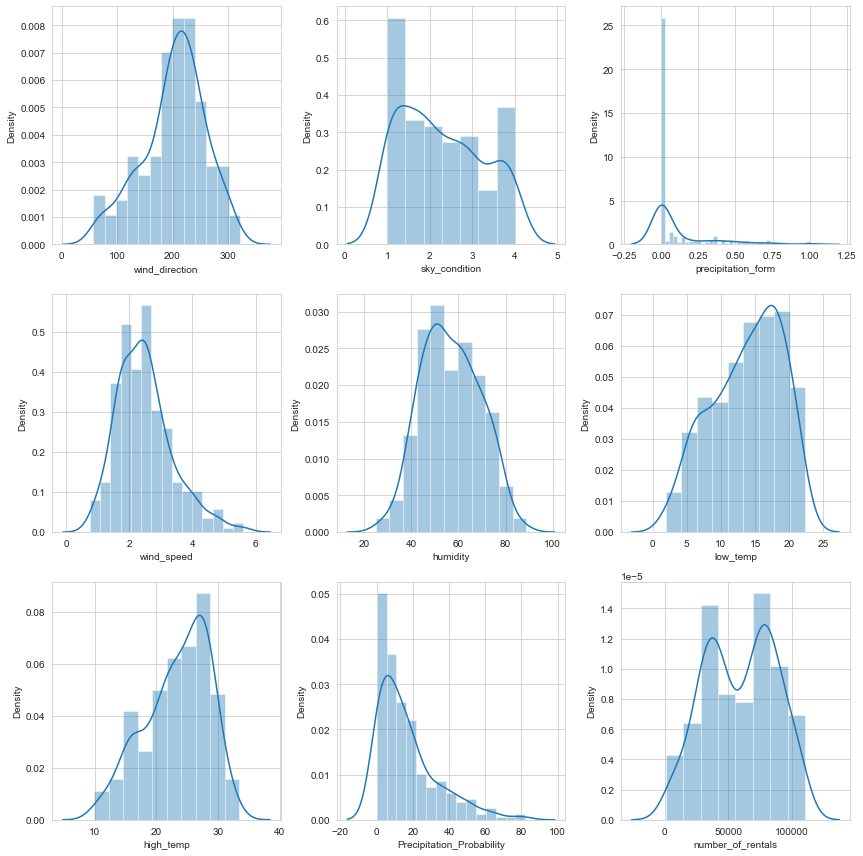

In [49]:
sns.set_style( 'whitegrid' )

plt.figure( figsize = ( 12, 12 ) )
for i in range( len( numerical_variable ) ):
    plt.subplot( 3, 3, i + 1 )
    sns.distplot( bicycle.loc[ :, numerical_variable[ i ] ] )
plt.tight_layout()
plt.show()

1. wind_direction( 풍향 (degree) ) 변수 데이터 분포는 높은쪽으로 치우친 정규 분포에 가까운 형태의 데이터 분포를 이루고 있다.
2. sky_condition( 하늘 상태 ) 변수 데이터 분포는 낮은값과 높은값이 높은 형태의 데이터 분포를 이루고 있다. 
3. precipitation_form( 강수 형태 ) 변수 데이터 분포는 낮은값과 나머지 값과의 차이많이 나는 데이터 분포를 이루고 있다.
4. wind_speed( 풍속 (m/s) ) 변수 데이터 분포는 정규 분포에 가까운 형태의 데이터 분포를 이루고 있다.
5. humidity( 습도 (%) ) 변수 데이터 분포는 낮은쪽으로 치우친 정규 분포에 가까운 형태의 데이터 분포를 이루고 있다.
6. low_temp( 최저 기온 ( `C) ) 변수 데이터 분포는 높은쪽으로 치우친 정규 분포에 가까운 형태의 데이터 분포를 이루고 있다.
7. high_temp( 최고 기온 ( `C) ) 변수 데이터 분포는 높은쪽으로 치우친 정규 분포에 가까운 형태의 데이터 분포를 이루고 있다.
8. Precipitation_Probability( 강수 확률 (%) ) 변수 데이터 분포는 낮은쪽으로 치우친 정규 분포에 가까운 형태의 데이터 분포를 이루고 있다.
9. number_of_rentals( 따릉이 대여량 ) 변수 데이터 분포는 평균은 기준으로 낮은쪽과 높은쪽에 최고값이 있는 데이터 분포를 이루고 있다.

### 날짜별 대여량 분석

In [50]:
day_df = bicycle.copy()

#### 년/월/일 분리

In [51]:
date_list = list( day_df.index )
year = []
month = []
day = []

for date in date_list:
    year.append( date[ :4 ] )
    month.append( date[ :7 ] )
    day.append( date[ 7: ] )
    
day_df[ 'year' ] = year
day_df[ 'month' ] = month
day_df[ 'day' ] = day

#### 년도별 대여량 분석

In [52]:
year = day_df[ 'year' ].value_counts().sort_index()
year

2018    91
2019    91
2020    91
Name: year, dtype: int64

In [53]:
years_list = []

for i in range( len( year.index ) ):
    years_list.append( day_df[ day_df[ 'year' ] == year.index[ i ] ] )

In [54]:
for i, v in enumerate( years_list ):
    print( f'{year.index[ i ]}년도 정보'.center( 30 ), '\n' )
    print( v.count() )
    print()

          2018년도 정보            

wind_direction               91
sky_condition                91
precipitation_form           91
wind_speed                   91
humidity                     91
low_temp                     91
high_temp                    91
Precipitation_Probability    91
number_of_rentals            91
year                         91
month                        91
day                          91
dtype: int64

          2019년도 정보            

wind_direction               91
sky_condition                91
precipitation_form           91
wind_speed                   91
humidity                     91
low_temp                     91
high_temp                    91
Precipitation_Probability    91
number_of_rentals            91
year                         91
month                        91
day                          91
dtype: int64

          2020년도 정보            

wind_direction               91
sky_condition                91
precipitation_form           91
wind_spee

In [55]:
year_sum = {}
for i, v in enumerate( years_list ):
    year_sum[ year.index[ i ] ] = [ round( v[ "number_of_rentals" ].sum(), 0 ), 
                                    round( v[ "number_of_rentals" ].mean(), 2 ) ]
year_sum_df = pd.DataFrame( year_sum, index = [ '합계대여회수', '평균대여회수'] )

In [56]:
print( '년도별 전체 대여회수/평균 대여회수'.center( 35 ), '\n' )
year_sum_df.T

        년도별 전체 대여회수/평균 대여회수         



,합계대여회수,평균대여회수
2018,2860617.0,31435.35
2019,5994774.0,65876.64
2020,7408578.0,81412.95


<AxesSubplot:>

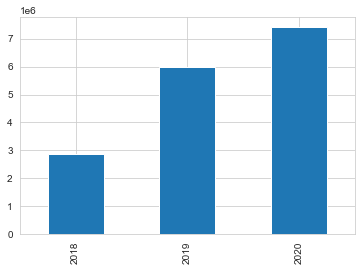

In [57]:
year_sum_df.T[ '합계대여회수' ].plot( kind = 'bar' )

<AxesSubplot:>

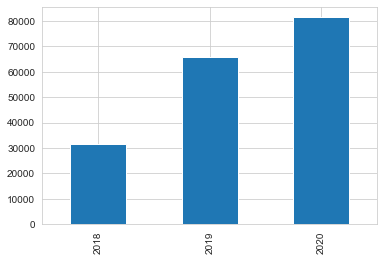

In [58]:
year_sum_df.T[ '평균대여회수' ].plot( kind = 'bar' )

* 연도가 증가할수록 대여 회수가 증가한다.

#### 년별 대여량 분석

In [59]:
year_sum_2018 = day_df[ day_df[ 'year' ] == years_list[ 0 ][ 'year' ][ 0 ] ]
year_sum_2019 = day_df[ day_df[ 'year' ] == years_list[ 1 ][ 'year' ][ 0 ] ]
year_sum_2020 = day_df[ day_df[ 'year' ] == years_list[ 2 ][ 'year' ][ 0 ] ]

Text(0.5, 1.0, '2018년 일변 대여 현황')

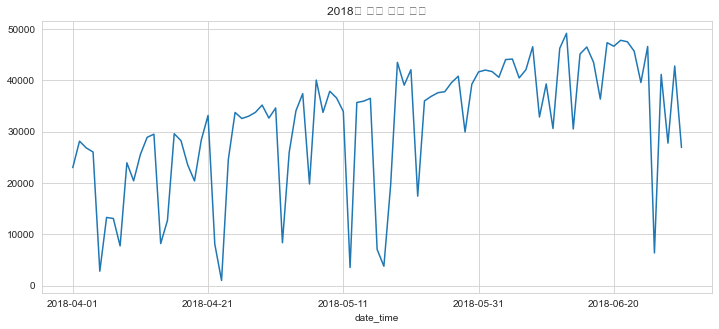

In [60]:
year_sum_2018[ 'number_of_rentals' ].plot( figsize = ( 12, 5 ) )
plt.title( '2018년 일변 대여 현황' )

Text(0.5, 1.0, '2019년 일변 대여 현황')

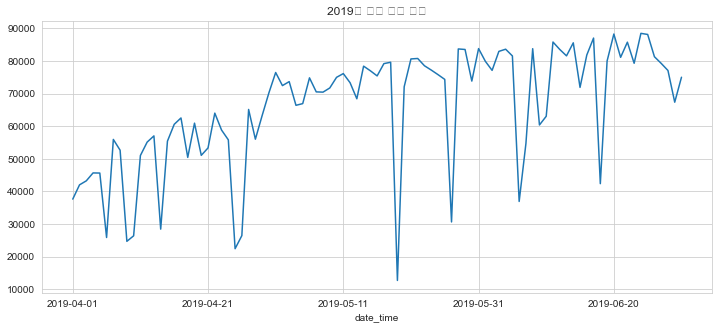

In [61]:
year_sum_2019[ 'number_of_rentals' ].plot( figsize = ( 12, 5 ) )
plt.title( '2019년 일변 대여 현황' )

Text(0.5, 1.0, '2020년 일변 대여 현황')

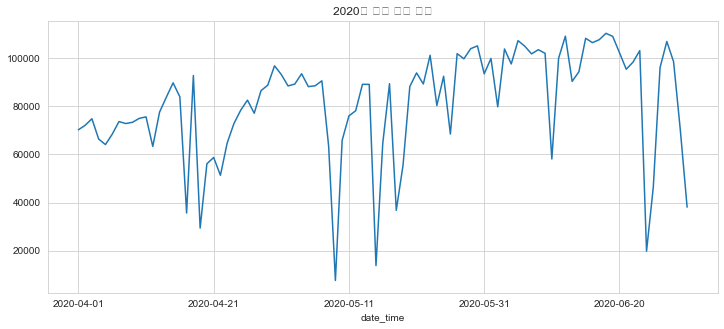

In [62]:
year_sum_2020[ 'number_of_rentals' ].plot( figsize = ( 12, 5 ) )
plt.title( '2020년 일변 대여 현황' )

### 상관 분석

In [63]:
bicycle_corr = bicycle.corr() 
bicycle_corr

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
wind_direction,1.000000,-0.386683,-0.348118,0.079138,-0.217112,-0.135984,-0.029813,-0.394495,0.209996
sky_condition,-0.386683,1.000000,0.673814,0.140816,0.651321,0.088365,-0.151566,0.912601,-0.384234
precipitation_form,-0.348118,0.673814,1.000000,0.287325,0.610185,0.045704,-0.143994,0.910609,-0.420458
wind_speed,0.079138,0.140816,0.287325,1.000000,0.036239,-0.399858,-0.443547,0.241207,-0.464761
humidity,-0.217112,0.651321,0.610185,0.036239,1.000000,0.414155,0.190136,0.685743,-0.147824
low_temp,-0.135984,0.088365,0.045704,-0.399858,0.414155,1.000000,0.920522,0.072320,0.317741
high_temp,-0.029813,-0.151566,-0.143994,-0.443547,0.190136,0.920522,1.000000,-0.163797,0.423113
Precipitation_Probability,-0.394495,0.912601,0.910609,0.241207,0.685743,0.072320,-0.163797,1.000000,-0.449225
number_of_rentals,0.209996,-0.384234,-0.420458,-0.464761,-0.147824,0.317741,0.423113,-0.449225,1.000000


<AxesSubplot:>

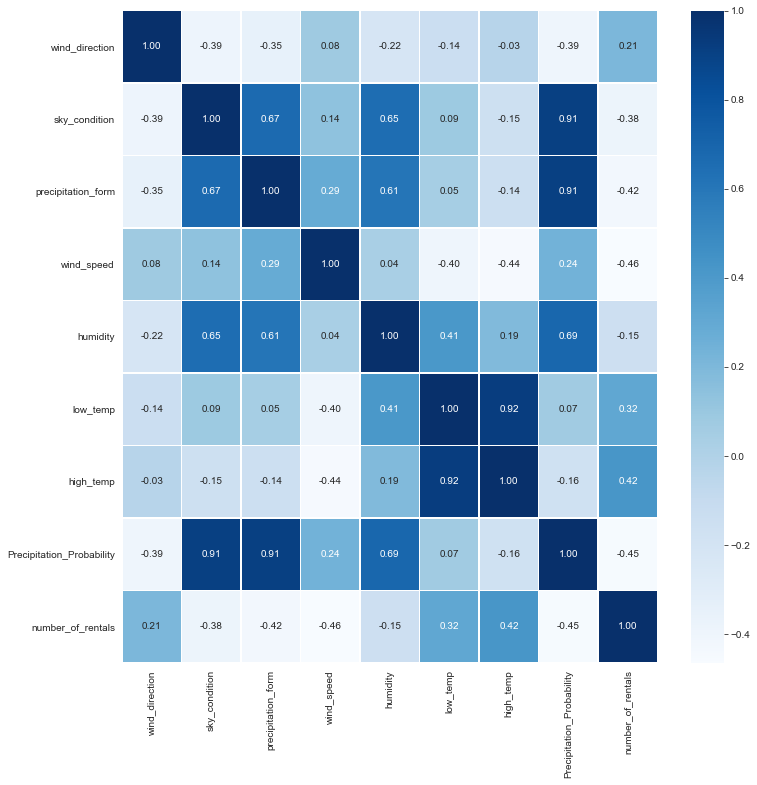

In [64]:
plt.figure( figsize = ( 12, 12 ) )
sns.heatmap( data = bicycle_corr, annot = True, fmt = '.2f', 
             linewidths = .5, cmap = 'Blues' )

* high_temp( 최고 기온 )변수와 low_temp( 최저 기온 )변수의 상관계수가 0.92로 강한 양의 상관관계를 갖는다.
* Precipitation_Probability( 강수 확률 )변수와 sky_condition( 하늘 상태 )변수, precipitation_form( 강수 형태 )변수는 0.91의 강한 상관 관계를 갖는다.
* Precipitation_Probability( 강수 확률 )변수와 humidity( 습도 )변수의 상관계수가 0.69로 양의 상관관계를 갖는다.
* precipitation_form( 강수 형태 )변수와 sky_condition( 하늘 상태 )변수의 상관계수가 0.67로 양의 상관관계를 갖는다.
* humidity( 습도 )변수와 sky_condition( 하늘 상태 )변수의 상관계수는 0.65, precipitation_form( 강수 형태 )변수의 상관계수는 0.61로 양의 상관관계를 갖는다.
* number_of_rentals( 따릉이 대여량 )변수와 나머지 변수간의 상관관계가 전반적으로 약한 상관관계를 갖는다.
* number_of_rentals( 따릉이 대여량 )변수와 wind_speed( 풍속 )변수는 -0.46, precipitation_form( 강수 형태 )변수는 -0.42, Precipitation_Probability( 강수 확률 )변수는 -0.45로 약한 음의 상관관계를 갖고, high_temp( 최고 기온 )변수는 0.42로 약한 양의 상관관계를 갖는다.

<AxesSubplot:xlabel='high_temp', ylabel='low_temp'>

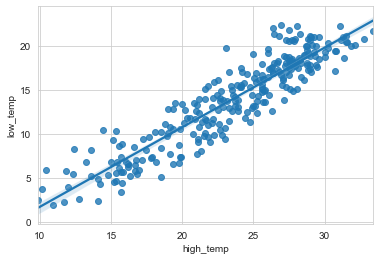

In [65]:
sns.regplot( x = 'high_temp', y = 'low_temp', data = bicycle )

<AxesSubplot:xlabel='Precipitation_Probability', ylabel='sky_condition'>

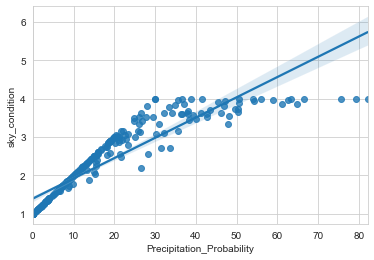

In [66]:
sns.regplot( x = 'Precipitation_Probability', y = 'sky_condition', data = bicycle )

<AxesSubplot:xlabel='Precipitation_Probability', ylabel='precipitation_form'>

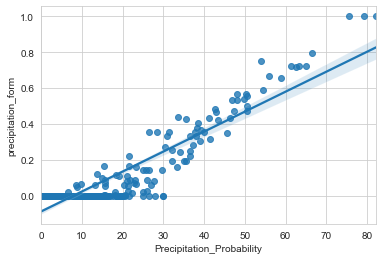

In [67]:
sns.regplot( x = 'Precipitation_Probability', y = 'precipitation_form', data = bicycle )

<AxesSubplot:xlabel='Precipitation_Probability', ylabel='humidity'>

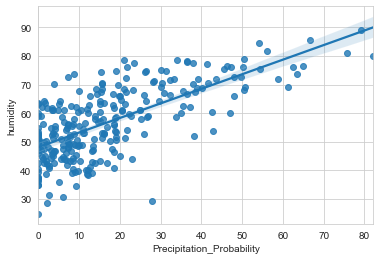

In [68]:
sns.regplot( x = 'Precipitation_Probability', y = 'humidity', data = bicycle )

<AxesSubplot:xlabel='precipitation_form', ylabel='sky_condition'>

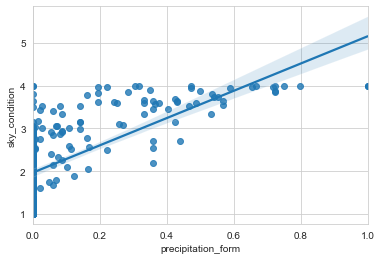

In [69]:
sns.regplot( x = 'precipitation_form', y = 'sky_condition', data = bicycle )

<AxesSubplot:xlabel='humidity', ylabel='sky_condition'>

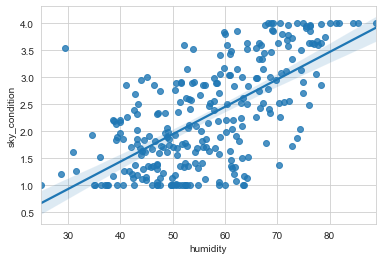

In [70]:
sns.regplot( x = 'humidity', y = 'sky_condition', data = bicycle )

<AxesSubplot:xlabel='humidity', ylabel='precipitation_form'>

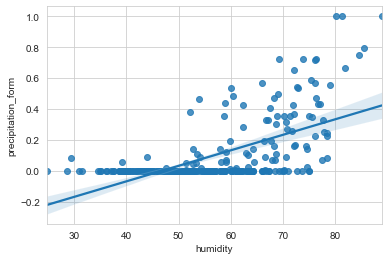

In [71]:
sns.regplot( x = 'humidity', y = 'precipitation_form', data = bicycle )

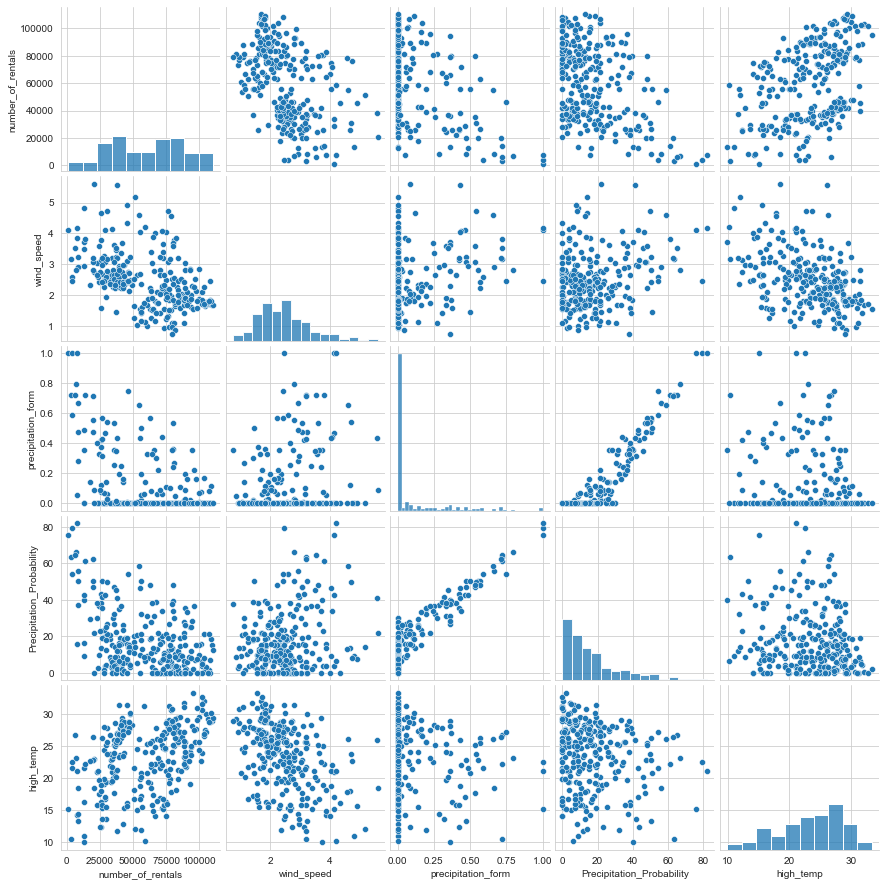

In [72]:
sns.pairplot( bicycle[ [ 'number_of_rentals', 'wind_speed', 'precipitation_form',
                         'Precipitation_Probability', 'high_temp' ] ] )

### 대여량 예측 모델

#### 입력/정답 데이터 분리

In [73]:
X = np.asarray( bicycle.drop( [ 'number_of_rentals' ], axis = 1 ) )
y = np.asarray( bicycle.number_of_rentals )

In [74]:
print( f'X shape : {X.shape}' )
print( f'y shape : {y.shape}' )

X shape : (273, 8)
y shape : (273,)


#### 학습용/테스트용 데이터 분리

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split( X, y, 
        test_size = 0.2, random_state = 1234 )

In [77]:
print( f'X_train shape : {X_train.shape}' )
print( f'y_train shape : {y_train.shape}' )
print( f'\nX_test shape : {X_test.shape}' )
print( f'y_test shape : {y_test.shape}' )

X_train shape : (218, 8)
y_train shape : (218,)

X_test shape : (55, 8)
y_test shape : (55,)


#### 입력 데이터 표준화( StandardScaler )

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
scaler = StandardScaler()
scaler.fit( X_train )
X_train_scaled = scaler.transform( X_train )
X_test_scaled = scaler.transform( X_test )

In [80]:
print( f'X_train_scaled mean : {X_train_scaled.mean()}' )
print( f'X_train_scaled std : {X_train_scaled.std()}' )
print( f'\nX_test_scaled mean : {X_test_scaled.mean()}' )
print( f'X_test_scaled std : {X_test_scaled.std()}' )

X_train_scaled mean : 3.66679164096382e-16
X_train_scaled std : 1.0

X_test_scaled mean : -0.004821746720102843
X_test_scaled std : 1.007594441946333


#### 다중 선형 회귀 모델 생성

In [81]:
from sklearn.linear_model import LinearRegression

In [82]:
model = LinearRegression()
model.fit( X_train_scaled, y_train )

LinearRegression()

#### 모델 평가

In [83]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [84]:
y_predict = model.predict( X_test_scaled )

In [85]:
print( f'다중 선형 회귀 모델 결정 계수 : {model.score( X_test_scaled, y_test ) }' )
print( f'\n다중 선형 회귀 모델 W( Weight )값 : {model.coef_}' )
print( f'다중 선형 회귀 모델 b( bias ) 값 : {model.intercept_}' )

다중 선형 회귀 모델 결정 계수 : 0.3605161682785657

다중 선형 회귀 모델 W( Weight )값 : [  4597.16393465  21476.24057968  16591.44821621  -7817.05573222
   2211.03549539  -2053.76911226   7558.21272346 -43277.22337588]
다중 선형 회귀 모델 b( bias ) 값 : 60427.29816513758


In [86]:
mae = mean_absolute_error( y_test, y_predict )
mse = mean_squared_error( y_test, y_predict )
rmse = np.sqrt( mse )
r2 = r2_score( y_test, y_predict )

In [87]:
print( f'MAE  : {mae:8.5f}' )
print( f'MSE  : {mse:8.5f}' )
print( f'RMSE : {rmse:8.5f}' )
print( f'R^2  : {r2:8.5f}' )

MAE  : 20547.69656
MSE  : 532413093.90656
RMSE : 23074.07840
R^2  :  0.36052


In [88]:
nmae = np.mean( abs( y_predict - y_test ) / y_test ) # nmae 계산

print( f'모델 NMAE: {nmae}' ) # 예측치와 실제값의 오차율

모델 NMAE: 0.6284209984178094


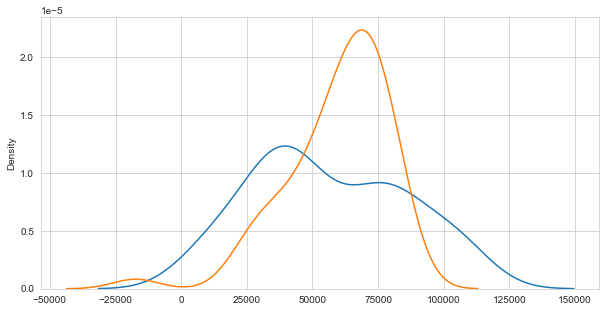

In [89]:
plt.figure( figsize = ( 10, 5 ) )
ax1 = sns.distplot( y_test, hist = False, label = 'y_test' )
ax2 = sns.distplot( y_predict, hist = False, label = 'y_predict', ax = ax1 )
plt.show()

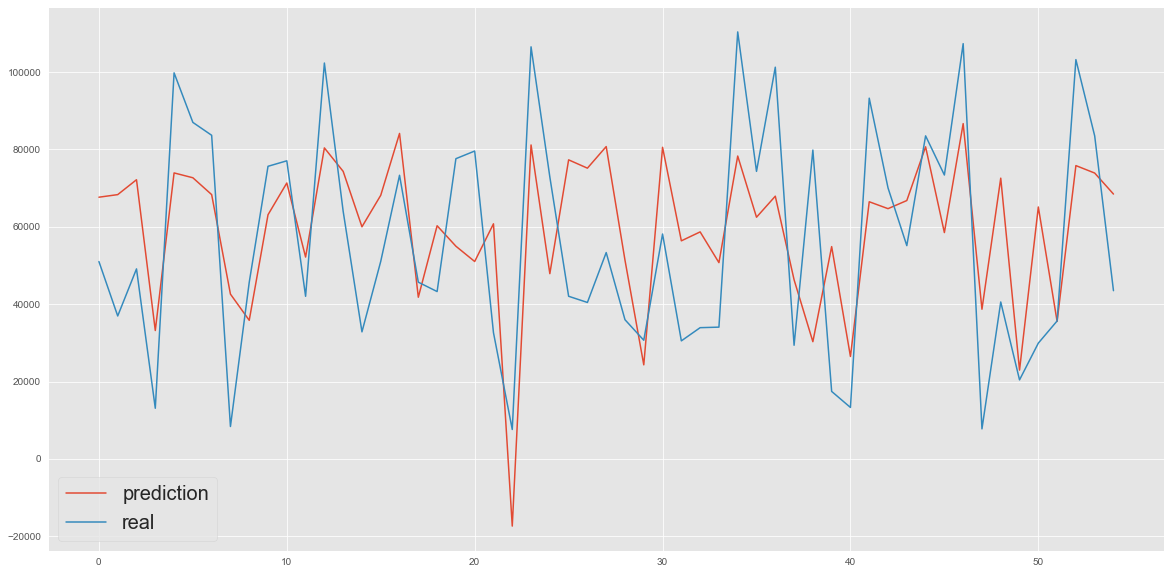

In [90]:
plt.style.use( 'ggplot' )
plt.figure( figsize = ( 20, 10 ) )
plt.plot( y_predict, label = 'prediction')
plt.plot( y_test, label = 'real' )
plt.legend( fontsize = 20 )
plt.show()